In [1]:
from PIL import Image
import rasterio
from matplotlib import pyplot

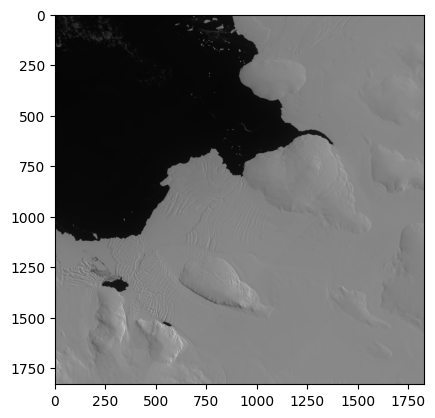

In [13]:
tiff_image = rasterio.open(r"D:\EAGLE\SS_2023\Deep_Learning_MET_4\Deep-Learning-Final-Project-SS-2023\Scene_data_2\T05CNQ_20200216T174429_B01.tif")
array = tiff_image.read(1)
pyplot.imshow(array, cmap='gray')
pyplot.show()

In [12]:
from PIL import Image
import rasterio
from matplotlib import pyplot

def create_binary_mask(tiff_path, threshold=128):
    try:
        # Open the TIFF image using Pillow
        tiff_image = rasterio.open(tiff_path)

        # Convert the image to grayscale (if it's not already)
        tiff_image = tiff_image.convert("L")

        # Threshold the image to create a binary mask
        binary_mask = tiff_image.point(lambda p: p > threshold and 255)

        return binary_mask
    except Exception as e:
        print(f"Error creating binary mask: {str(e)}")
        return None

if __name__ == "__main__":
    tiff_path = r"D:\EAGLE\SS_2023\Deep_Learning_MET_4\Deep-Learning-Final-Project-SS-2023\Scene_data_2\T05CNQ_20200216T174429_B01.tif"   # Replace with the path to your TIFF image
    threshold_value = 128     # Threshold value for binary mask creation
    
    binary_mask = create_binary_mask(tiff_path, threshold=threshold_value)
    if binary_mask:
        # Save the binary mask as an image
        binary_mask_path = r"D:/EAGLE/SS_2023/Deep_Learning_MET_4/Deep-Learning-Final-Project-SS-2023/Data/binary_masks/binary_mask.png"
        binary_mask.save(binary_mask_path, format='PNG')
        print(f"Binary mask saved as {binary_mask_path}")

Error creating binary mask: 'DatasetReader' object has no attribute 'convert'


In [14]:
import rasterio
from rasterio.plot import reshape_as_image
import numpy as np

def raster_to_binary_mask(input_raster, output_mask, threshold=128):
    try:
        # Open the input raster using rasterio
        with rasterio.open(input_raster) as src:
            # Read the raster data
            raster_data = src.read(1)

            # Apply threshold to create a binary mask
            binary_mask = (raster_data > threshold).astype(np.uint8) * 255

            # Write the binary mask to an output raster file
            profile = src.profile
            profile.update(dtype=rasterio.uint8, count=1)

            with rasterio.open(output_mask, 'w', **profile) as dst:
                dst.write(binary_mask, 1)
        
        print(f"Binary mask created and saved as {output_mask}")
    except Exception as e:
        print(f"Error creating binary mask: {str(e)}")

if __name__ == "__main__":
    input_raster = r"D:\EAGLE\SS_2023\Deep_Learning_MET_4\Deep-Learning-Final-Project-SS-2023\Scene_data_2\T05CNQ_20200216T174429_B01.tif"    # Replace with the path to your input raster image
    output_mask = r"D:\EAGLE\SS_2023\Deep_Learning_MET_4\Deep-Learning-Final-Project-SS-2023\Data\binary_masks\output_mask.tif"  # Replace with the desired output binary mask path
    threshold_value = 128     # Threshold value for binary mask creation
    
    raster_to_binary_mask(input_raster, output_mask, threshold=threshold_value)


Binary mask created and saved as D:\EAGLE\SS_2023\Deep_Learning_MET_4\Deep-Learning-Final-Project-SS-2023\Data\binary_masks\output_mask.tif
